<a href="https://colab.research.google.com/github/guptapawan227/Capstone_AIML/blob/Pawan/1_Jan_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
!pip3 install ftfy

     |████████████████████████████████| 71kB 3.4MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=57d8d36d4e6f9d8a0bae021bf69458ad68928408efad6954a6e358ced6a81d6f
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


Importing Libraries

In [4]:
# Using TensorFlow 1.x only in colab as found a issue with 2.3 version used by colab while working with DNN model fit. Did not observe any issue with Tensor flow 2.1 version on local jupyter enviornment.
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [109]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time, os, sys, itertools, re 
from PIL import Image
import warnings, pickle, string
from dateutil import parser
%matplotlib inline

# Data Visualization
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import ftfy
from ftfy import fix_text, badness
from sklearn import tree
# Traditional Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sequential Modeling
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Reading the data from excel 

## Language Translation

#### Load the consolidated final translated pickle file which contains the language translations. The Process used for language translation is commented below

In [8]:
!pip install langdetect

     |████████████████████████████████| 983kB 3.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=e28d19fb43ecba83ca7b4acc53f8ae74904666424399a92ffb6a39ec304d2410
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


## Data Augmentation

In [9]:
# Load the consolidated final translated pickle file 
#with open('/content/drive/MyDrive/Capstone_AIML_Pawan/Final_Augmented_data.pkl','rb') as f:
with open('/content/drive/MyDrive/Capstone_AIML_Pawan/Interim_Augmented_data.pkl','rb') as f:
    clean_data_result = pickle.load(f)

In [10]:
clean_data_result

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' s happened again The PC has sa...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi by Axesnghb Cyzuomxa Sent Thursday 20 Ughz...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"After this IE browser opened the CRM it, even ..."
1,lpnzjimy mwtvondq,GRP_25,de,Currents are change entered first following EU...
...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,The display does not appear in the morning. Di...
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,The prtsid _- file cannot be printed to the pr...
46,fupikdoa gjkytoeh,GRP_48,zh-cn,The online delivery unit provided by the custo...
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"Show ""Data from the employee, please notify th..."


## Stop words removal and Lemmatise text

In [11]:
clean_data_result.isnull().sum()

Caller              0
Assignment group    0
language            0
Final_Text          0
dtype: int64

In [12]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english')) 

processed_all_documents = list()

for desc in clean_data_result['Final_Text']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    words = ' '.join(filtered_sentence)
    processed_all_documents.append(words)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
clean_data_result['Final_Text'] = processed_all_documents

In [14]:
clean_data_result.head(50)

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happened The PC saw titled rep...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"After IE browser opened CRM , even prompted us..."
1,lpnzjimy mwtvondq,GRP_25,de,Currents change entered first following EU Too...
1,lpnzjimy mwtvondq,GRP_25,de,Change Cable VGA Jionmpsf WnkpZcmv Cable VGA R...
1,lpnzjimy mwtvondq,GRP_25,de,Message Error could - information Hostname No ...
1,lpnzjimy mwtvondq,GRP_25,de,"When open tokyo sales order , electronic `` Cr..."
2,tbioceqj ukjietwz,GRP_33,de,Automatic data processing supposed ak-47 data ...
2,tbioceqj ukjietwz,GRP_33,de,Hello requires Ahmet K material stamp makes pr...


In [16]:
clean_data_result.dropna()

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happened The PC saw titled rep...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"After IE browser opened CRM , even prompted us..."
1,lpnzjimy mwtvondq,GRP_25,de,Currents change entered first following EU Too...
...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,The display appear morning . Display light
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,"The prtsid _- file printed printer , prompting..."
46,fupikdoa gjkytoeh,GRP_48,zh-cn,The online delivery unit provided customer ca ...
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"Show `` Data employee , please notify system a..."


In [17]:
clean_data_result.isnull().sum()

Caller              0
Assignment group    0
language            0
Final_Text          0
dtype: int64

In [18]:
#Lemmatisation using spacy library
!pip install spacy

In [19]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

     |████████████████████████████████| 12.1MB 1.2MB/s 
     |████████████████████████████████| 10.4MB 4.7MB/s 
     |████████████████████████████████| 1.1MB 34.4MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=b1d2ddc1f5c0aaadfa37c15d9213923db1f2c6c07d68dd092d1a6881f4b02c55
  Stored in directory: /root/.cache/pip/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [20]:
!pip3 install spacy

In [21]:
# Need to run "python -m spacy download en" in anaconda prompt to avoid 'en' not found issue.

In [22]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

clean_data_result['Final_Text'] = clean_data_result['Final_Text'].apply(lemmatize_text)

In [23]:
clean_data_result

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happen the pc see title repeat...
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"after IE browser open CRM , even prompt user c..."
1,lpnzjimy mwtvondq,GRP_25,de,current change enter first follow EU Tool Erro...
...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,the display appear morning . display light
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,"the prtsid _ - file print printer , prompt pri..."
46,fupikdoa gjkytoeh,GRP_48,zh-cn,the online delivery unit provide customer ca n...
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"show ` ` data employee , please notify system ..."


In [24]:
clean_data_result1 = clean_data_result[clean_data_result['Final_Text'] != '']

In [25]:
clean_data_result1

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happen the pc see title repeat...
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"after IE browser open CRM , even prompt user c..."
1,lpnzjimy mwtvondq,GRP_25,de,current change enter first follow EU Tool Erro...
...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,the display appear morning . display light
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,"the prtsid _ - file print printer , prompt pri..."
46,fupikdoa gjkytoeh,GRP_48,zh-cn,the online delivery unit provide customer ca n...
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"show ` ` data employee , please notify system ..."


In [26]:
assignment_group_cnt=clean_data_result1['Assignment group'].value_counts()
assignment_group_cnt.describe()

count      55.000000
mean      508.945455
std       707.062767
min        25.000000
25%       102.000000
50%       211.000000
75%       679.000000
max      3738.000000
Name: Assignment group, dtype: float64

In [27]:
assignment_group_cnt.tail(24)

GRP_22    186
GRP_11    184
GRP_21    173
GRP_17    150
GRP_23    149
GRP_47    144
GRP_62    143
GRP_30    112
GRP_60    108
GRP_27    108
GRP_37     96
GRP_44     89
GRP_50     77
GRP_36     72
GRP_39     69
GRP_65     66
GRP_53     66
GRP_48     58
GRP_52     49
GRP_51     48
GRP_59     31
GRP_43     30
GRP_49     26
GRP_46     25
Name: Assignment group, dtype: int64

In [28]:
# Serialize the translated dataset
clean_data_result1.to_csv('Final_data.csv', index=False, encoding='utf_8_sig')
#with open('/content/Final_data.pkl','wb') as f:
with open('Final_data.pkl','wb') as f:
    pickle.dump(clean_data_result1, f, pickle.HIGHEST_PROTOCOL)

In [29]:
# Load the translated pickle file 
#with open('/content/Final_data.pkl','rb') as f:
with open('Final_data.pkl','rb') as f:
    clean_data = pickle.load(f)

## Prepping Dataframe for Model Building

In [30]:
clean_data

,Caller,Assignment group,language,Final_Text
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happen the pc see title repeat...
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello Ben Tige right Number Block Keyboard R L...
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...
0,vrfpyjwi nzhvgqiw,GRP_24,de,"after IE browser open CRM , even prompt user c..."
1,lpnzjimy mwtvondq,GRP_25,de,current change enter first follow EU Tool Erro...
...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,the display appear morning . display light
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,"the prtsid _ - file print printer , prompt pri..."
46,fupikdoa gjkytoeh,GRP_48,zh-cn,the online delivery unit provide customer ca n...
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"show ` ` data employee , please notify system ..."


In [31]:
'''# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
clean_data['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data['Assignment group']) 
  


onehot_encoder = OneHotEncoder()
clean_data['Assignment group LabelEncoded'] = clean_data['Assignment group LabelEncoded'].values.reshape(len(clean_data['Assignment group LabelEncoded']), 1)
clean_data['Assignment group OneHotEncoded'] = onehot_encoder.fit_transform(clean_data[['Assignment group LabelEncoded']])
clean_data['Assignment group OneHotEncoded']'''

"# Import label encoder \nfrom sklearn import preprocessing\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n  \n# label_encoder object knows how to understand word labels. \nlabel_encoder = preprocessing.LabelEncoder() \n  \n# Encode labels in column 'species'. \nclean_data['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data['Assignment group']) \n  \n\n\nonehot_encoder = OneHotEncoder()\nclean_data['Assignment group LabelEncoded'] = clean_data['Assignment group LabelEncoded'].values.reshape(len(clean_data['Assignment group LabelEncoded']), 1)\nclean_data['Assignment group OneHotEncoded'] = onehot_encoder.fit_transform(clean_data[['Assignment group LabelEncoded']])\nclean_data['Assignment group OneHotEncoded']"

In [32]:
# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
clean_data['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data['Assignment group']) 

target_strings = label_encoder.inverse_transform(clean_data['Assignment group LabelEncoded'])
target_strings_list = np.unique(target_strings).tolist()
clean_data['Assignment group LabelEncoded']

0     17
0     17
0     17
0     17
1     18
      ..
44    24
45    25
46    40
47    24
48    24
Name: Assignment group LabelEncoded, Length: 27992, dtype: int64

In [33]:
'''# Create a target categorical column
clean_data['Assignment group LabelEncoded'] = clean_data['Assignment group'].astype('category').cat.codes
clean_data.info()'''

"# Create a target categorical column\nclean_data['Assignment group LabelEncoded'] = clean_data['Assignment group'].astype('category').cat.codes\nclean_data.info()"

In [34]:
clean_data

,Caller,Assignment group,language,Final_Text,Assignment group LabelEncoded
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello however ' happen the pc see title repeat...,17
0,vrfpyjwi nzhvgqiw,GRP_24,de,hello Ben Tige right Number Block Keyboard R L...,17
0,vrfpyjwi nzhvgqiw,GRP_24,de,Fyi Axesnghb Cyzuomxa Sent Thursday 20 Ughzilf...,17
0,vrfpyjwi nzhvgqiw,GRP_24,de,"after IE browser open CRM , even prompt user c...",17
1,lpnzjimy mwtvondq,GRP_25,de,current change enter first follow EU Tool Erro...,18
...,...,...,...,...,...
44,wgmqlnzh vpebwoat,GRP_30,zh-cn,the display appear morning . display light,24
45,rtjwbuev gfpwdetq,GRP_31,zh-cn,"the prtsid _ - file print printer , prompt pri...",25
46,fupikdoa gjkytoeh,GRP_48,zh-cn,the online delivery unit provide customer ca n...,40
47,kyagjxdh dmtjpbnz,GRP_30,zh-cn,"show ` ` data employee , please notify system ...",24


In [35]:
clean_data.isnull().sum()

Caller                           0
Assignment group                 0
language                         0
Final_Text                       0
Assignment group LabelEncoded    0
dtype: int64

In [36]:
label_encoded_dict = dict(zip(clean_data['Assignment group'].unique(), clean_data['Assignment group LabelEncoded'].unique()))
label_encoded_dict

{'GRP_0': 0,
 'GRP_1': 1,
 'GRP_10': 2,
 'GRP_11': 3,
 'GRP_12': 4,
 'GRP_13': 5,
 'GRP_14': 6,
 'GRP_15': 7,
 'GRP_16': 8,
 'GRP_17': 9,
 'GRP_18': 10,
 'GRP_19': 11,
 'GRP_2': 12,
 'GRP_20': 13,
 'GRP_21': 14,
 'GRP_22': 15,
 'GRP_23': 16,
 'GRP_24': 17,
 'GRP_25': 18,
 'GRP_26': 19,
 'GRP_27': 20,
 'GRP_28': 21,
 'GRP_29': 22,
 'GRP_3': 23,
 'GRP_30': 24,
 'GRP_31': 25,
 'GRP_33': 26,
 'GRP_34': 27,
 'GRP_36': 28,
 'GRP_37': 29,
 'GRP_39': 30,
 'GRP_4': 31,
 'GRP_40': 32,
 'GRP_41': 33,
 'GRP_42': 34,
 'GRP_43': 35,
 'GRP_44': 36,
 'GRP_45': 37,
 'GRP_46': 38,
 'GRP_47': 39,
 'GRP_48': 40,
 'GRP_49': 41,
 'GRP_5': 42,
 'GRP_50': 43,
 'GRP_51': 44,
 'GRP_52': 45,
 'GRP_53': 46,
 'GRP_59': 47,
 'GRP_6': 48,
 'GRP_60': 49,
 'GRP_62': 50,
 'GRP_65': 51,
 'GRP_7': 52,
 'GRP_8': 53,
 'GRP_9': 54}

In [37]:
# Splitting Train Test 
from sklearn.model_selection import train_test_split
#Y = np.array(clean_data['Assignment group OneHotEncoded'])

X_train, X_test, y_train1, y_test1 = train_test_split(clean_data['Final_Text'], clean_data['Assignment group LabelEncoded'], test_size=0.3, random_state = 0, stratify=clean_data['Assignment group LabelEncoded'])
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train1.shape, y_test1.shape)

Shape of the training set: (19594,) (8398,)
Shape of the test set: (19594,) (8398,)


In [38]:
#Using TFIDF vectors feature extraction
Tfidf_vect = TfidfVectorizer(max_features=2500)
Tfidf_vect.fit(clean_data.Final_Text.astype(str))
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

In [41]:
#using count vectorizer for features extraction
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(max_features=2500)

X_BoW = CV.fit_transform(clean_data['Final_Text']).toarray()
y = clean_data['Assignment group LabelEncoded']

print("Shape of Input Feature :",np.shape(X_BoW))
print("Shape of Target Feature :",np.shape(y))

Shape of Input Feature : (27992, 2500)
Shape of Target Feature : (27992,)


In [42]:
# Splitting Train Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_BoW, y, test_size=0.3, random_state = 0, stratify=y)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (19594, 2500) (8398, 2500)
Shape of the test set: (19594,) (8398,)


In [113]:
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
  
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=25, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the clasiffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the clasiffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
        
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, clf.predict(X_test))))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred, target_names=target_strings_list)))
      

In [ ]:
def run_visualization(estimator, X_train, X_test, y_train, y_test):
  clf = estimator
  if LogisticRegression :
  elif MultinomialNB :
  elif KNeighborsClassifier :
  elif LinearSVC :
  elif DecisionTreeClassifier :
  elif RandomForestClassifier :
  elif GradientBoostingClassifier :
  elif XGBClassifier :
  elif BaggingClassifier :
  elif StackingClassifier :
  else VotingClassifier :  


## Logistic Regression

In [105]:
run_classification(LogisticRegression(C=5, penalty='l2', solver='liblinear'), X_train_tfidf, X_test_tfidf, y_train1, y_test1)


Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Training accuracy: 86.00%
Testing accuracy: 73.11%
Confusion matrix:
 [[765   0   2 ...   3   6   4]
 [  3  27   0 ...   0   6   0]
 [  2   0 164 ...   0  41  15]
 ...
 [ 11   0   1 ...  97   0   0]
 [ 11   1   7 ...   0 905  85]
 [ 12   0   2 ...   0 172 170]]
Classificat

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Training accuracy: 85.03%
Testing accuracy: 73.04%
Confusion matrix:
 [[775   0   2 ...   3   2   4]
 [  4  25   0 ...   0   6   0]
 [  2   0 161 ...   0  44  12]
 ...
 [ 10   0   1 ...  97   1   0]
 [  7   1   6 ...   0 918  81]
 [ 11   0   1 ...   0 182 166]]
Classificat

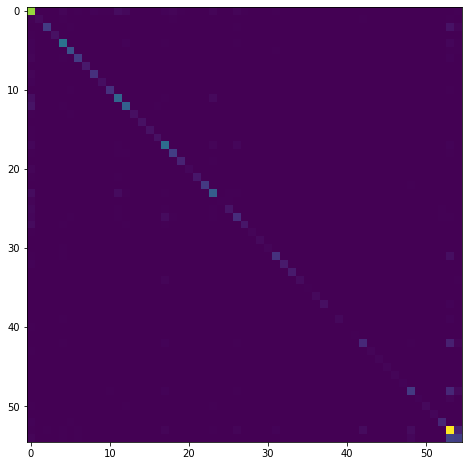

In [84]:
run_classification(LogisticRegression(C=5, penalty='l2', solver='liblinear'), X_train, X_test, y_train, y_test)

## Naive Bayes Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=0, class_prior=None, fit_prior='True'))],
         verbose=False)
Training accuracy: 81.13%
Testing accuracy: 60.42%
Confusion matrix:
 [[759   0   2 ...   6  13   2]
 [  4  12   0 ...   0   8   1]
 [ 11   0 132 ...   0  41  24]
 ...
 [ 25   0   2 ...  69   0   1]
 [  9   1  10 ...   1 794 143]
 [ 23   0   3 ...   0 138 179]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.51      0.79      0.62       955
       GRP_1       0.60      0.20      0.30        61
      GRP_10       0.73      0.54      0.62       246
      GRP_11       0.90      0.51      0.65        55
      GRP_12       0.56      0.71      0.63       419
      GRP_13       0.67      0.85      0.75       259
      GRP_14     

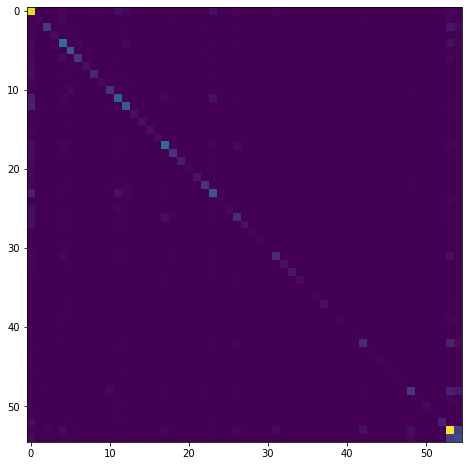

In [85]:
run_classification(MultinomialNB(alpha=0, class_prior=None, fit_prior='True'), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

In [ ]:
run_classification(MultinomialNB(alpha=0, class_prior=None, fit_prior='True'), X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=0, class_prior=None, fit_prior='True'))],
         verbose=False)
Training accuracy: 80.57%
Testing accuracy: 61.04%
Confusion matrix:
 [[783   0   2 ...   6  10   2]
 [  4  11   0 ...   0   9   1]
 [ 10   0 130 ...   0  48  18]
 ...
 [ 26   0   2 ...  69   0   1]
 [  8   1   9 ...   1 829 124]
 [ 24   0   4 ...   0 161 161]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.50      0.82      0.62       955
       GRP_1       0.61      0.18      0.28        61
      GRP_10       0.73      0.53      0.61       246
      GRP_11       0.88      0.51      0.64        55
      GRP_12       0.57      0.71      0.63       419
      GRP_13       0.67      0.84      0.74       259
      GRP_14     

## K-nearest Neighbor

In [ ]:
run_classification(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance'), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='distance'))],
         verbose=False)
Training accuracy: 97.30%
Testing accuracy: 73.24%
Confusion matrix:
 [[597   0   5 ...   6   4   5]
 [  0  40   0 ...   0   6   0]
 [  0   0 175 ...   0  23  14]
 ...
 [  6   0   0 ...  99   0   0]
 [  8   4  64 ...   1 738  91]
 [  1   4  35 ...   0  74 178]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.79      0.63      0.70       955
       GRP_1       0.74      0.66      0.70        61
      GRP_10       0.54      0.7

In [ ]:
run_classification(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='distance'))],
         verbose=False)
Training accuracy: 97.30%
Testing accuracy: 75.32%
Confusion matrix:
 [[601   0   2 ...   5   2   4]
 [  0  39   0 ...   0   6   0]
 [  0   0 180 ...   0  23  13]
 ...
 [  8   0   0 ... 105   0   0]
 [  6   4  67 ...   0 744  96]
 [  1   3  40 ...   0  93 176]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.82      0.63      0.71       955
       GRP_1       0.75      0.64      0.69        61
      GRP_10       0.55      0.7

## Support Vector Machine (SVM)

In [ ]:
run_classification(LinearSVC(C=1), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)
Training accuracy: 88.48%
Testing accuracy: 73.85%
Confusion matrix:
 [[719   1   5 ...   4   8   9]
 [  0  30   0 ...   0   5   0]
 [  1   0 166 ...   0  39  17]
 ...
 [  8   0   1 ... 101   0   0]
 [  9   1   9 ...   0 874  91]
 [  9   0   3 ...   0 164 164]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.71      0.75      0.73       955
       GRP_1       0.75      0.49      0

In [ ]:
run_classification(LinearSVC(C=1), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)
Training accuracy: 87.79%
Testing accuracy: 74.46%
Confusion matrix:
 [[732   0   3 ...   3   3   7]
 [  0  31   0 ...   0   5   0]
 [  1   0 165 ...   0  41  15]
 ...
 [  8   0   1 ... 102   0   0]
 [  6   1   7 ...   0 901  84]
 [  9   0   4 ...   0 175 165]]
Classification report:
               precision    recall  f1-score   support

       GRP_0       0.71      0.77      0.73       955
       GRP_1       0.82      0.51      0

## Decision Tree

In [112]:
run_classification(DecisionTreeClassifier(criterion='gini', min_samples_leaf=2), X_train, X_test, y_train, y_test)

NotFittedError: ignored

In [ ]:
run_classification(DecisionTreeClassifier(criterion='gini', min_samples_leaf=2), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)
Training accuracy: 88.19%
Testing accuracy: 61.44%
Confusion matrix:
 [[644   1   7 ...   3   2   5]
 [  5  3

## Random Forest

In [ ]:
run_classification(RandomForestClassifier(criterion= 'entropy', n_estimators=100, random_state=0), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, 

In [ ]:
run_classification(RandomForestClassifier(criterion= 'entropy', n_estimators=100, random_state=0), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, 

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
run_classification(GradientBoostingClassifier(max_depth=15, n_estimators=50, random_state=42), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=15, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=50,
                   

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
run_classification(GradientBoostingClassifier(max_depth=15, n_estimators=50, random_state=42), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=15, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=50,
                   

## XGBoosting

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
run_classification(XGBClassifier(n_estimators=50, max_depth=15), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Training accuracy: 89.37%
Testing accuracy: 69.50%
Confusion matrix:
 [[755  

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
run_classification(BaggingClassifier(n_estimators=100, random_state=10), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=1.0,
                                   max_samples=1.0, n_estimators=100,
                                   n_jobs=None, oob_score=False,
                                   random_state=10, verbose=0,
                                   warm_start=False))],
         verbose=False)
Training accuracy: 97.99%
Testing accuracy: 72.91%
Confusion matrix:
 [[715   0   4 ...   3   2   5]
 [  3  34   0 ...   0   9   0]
 [  5   0 159 ...   0  46  10]
 ...
 [  9   0   0 ... 101   0   0]
 [  7   0   7 ...   0 922  63]
 [  5   0   3 ...   0 188 154]]
Classification report:
               precision    recall  f1-score   support

       GRP_0   

## Stacking

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)), ('svr', make_pipeline(StandardScaler(with_mean=False), LinearSVC(random_state=42)))]

run_classification(StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier()), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 StackingClassifier(cv=None,
                                    estimators=[('rf',
                                                 RandomForestClassifier(bootstrap=True,
                                                                        ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                        max_depth=None,
                                                                        max_features='auto',
                                                                        max_leaf_nodes=None,
                                                       

## Voting

In [ ]:
from sklearn.ensemble import VotingClassifier


estimators = [('rf', RandomForestClassifier(criterion= 'entropy', n_estimators=100, random_state=42)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')), ('bg', BaggingClassifier(n_estimators=100, random_state=42)), ('lsvc', LinearSVC(C=1, random_state=42))]

run_classification(VotingClassifier(estimators=estimators, voting='hard'), X_train_tfidf, X_test_tfidf, y_train1, y_test1)

Estimator: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(bootstrap=True,
                                                                      ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='entropy',
                                                                      max_depth=None,
                                                                      max_features='auto',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                         

## Deep Neural Networks

In [ ]:
# Load the augmented data from pickle file 
#with open(''/content/Final_data.pkl','rb') as f:
with open('Final_data.pkl','rb') as f:
    clean_data_DL = pickle.load(f)

In [ ]:
clean_data_DL.isnull().sum()

Caller              0
Assignment group    0
language            0
Final_Text          0
dtype: int64

In [ ]:
clean_data_DL['Final_Text'] = clean_data_DL['Final_Text'].replace(np.nan, '', regex=True)

In [ ]:
clean_data_DL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27992 entries, 0 to 48
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Caller            27992 non-null  object
 1   Assignment group  27992 non-null  object
 2   language          27992 non-null  object
 3   Final_Text        27992 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
clean_data_DL['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data_DL['Assignment group']) 
  
clean_data_DL['Assignment group LabelEncoded'].unique()

array([17, 18, 26, 21,  1, 12, 34, 23,  2, 27, 31,  4, 42, 48, 52, 53, 54,
        3,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 19, 20, 22, 24, 25,
       28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 40, 47,
       49, 50, 51,  0])

In [ ]:
label_encoded_dict = dict(zip(clean_data_DL['Assignment group'].unique(), clean_data_DL['Assignment group LabelEncoded'].unique()))
len(label_encoded_dict)

55

In [ ]:
# Splitting Train Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data_DL['Final_Text'], clean_data_DL['Assignment group LabelEncoded'], test_size=0.3, random_state = 0, stratify=clean_data_DL['Assignment group LabelEncoded'])
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (19594,) (8398,)
Shape of the test set: (19594,) (8398,)


### Create checkpoints function

In [ ]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.01, patience=3)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

In [ ]:
# Function to build Neural Network
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization

Tfidf_vect = TfidfVectorizer(max_features=2500)
Tfidf_vect.fit(clean_data_DL.Final_Text.astype(str))
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 55)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1280512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_______________________________________

In [ ]:
run_classification(model_DNN, X_train_tfidf, X_test_tfidf, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='DNN')

'''model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)'''


Train on 19594 samples, validate on 8398 samples
Epoch 1/25
19594/19594 [==============================] - 17s 845us/step - loss: 3.1109 - accuracy: 0.2616 - val_loss: 3.2341 - val_accuracy: 0.2890

Epoch 00001: val_loss improved from inf to 3.23414, saving model to Weights/DNN_epoch01_loss3.2341.h5
Epoch 2/25
19594/19594 [==============================] - 15s 756us/step - loss: 1.8515 - accuracy: 0.4968 - val_loss: 2.4888 - val_accuracy: 0.4518

Epoch 00002: val_loss improved from 3.23414 to 2.48876, saving model to Weights/DNN_epoch02_loss2.4888.h5
Epoch 3/25
19594/19594 [==============================] - 14s 690us/step - loss: 1.2843 - accuracy: 0.6379 - val_loss: 1.5121 - val_accuracy: 0.6109

Epoch 00003: val_loss improved from 2.48876 to 1.51208, saving model to Weights/DNN_epoch03_loss1.5121.h5
Epoch 4/25
19594/19594 [==============================] - 11s 581us/step - loss: 0.9204 - accuracy: 0.7276 - val_loss: 0.9892 - val_accuracy: 0.7197

Epoch 00004: val_loss improved from 

'model_DNN.fit(X_train_tfidf, y_train,\n                              validation_data=(X_test_tfidf, y_test),\n                              callbacks=call_backs("NN"),\n                              epochs=10,\n                              batch_size=128,\n                              verbose=2)\npredicted = model_DNN.predict(X_test_tfidf)'

### Extract Glove Embeddings

In [ ]:
#download the glove embedding zip file from http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
from zipfile import ZipFile
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.200d.txt'):
    glove_embeddings = 'glove.6B.zip'
    #glove_embeddings = '/content/drive/MyDrive/Capstone/glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

FileNotFoundError: ignored

## Convolutional Neural Networks (CNN)

In [ ]:
gloveFileName = 'glove.6B/glove.6B.200d.txt'
#gloveFileName = '/content/glove.6B/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 55)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

## Recurrent Neural Networks (RNN) --> Gated Recurrent Unit (GRU)

In [ ]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 55)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

## RNN with LSTM networks

In [ ]:
EMBEDDING_DIM = 200
gloveFileName = 'glove.6B/glove.6B.100d.txt'
#gloveFileName = '/content/glove.6B/glove.6B.200d.txt'

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 55)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')